In [172]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
data = pd.read_csv('dataset.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data Perprocessing

In [174]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


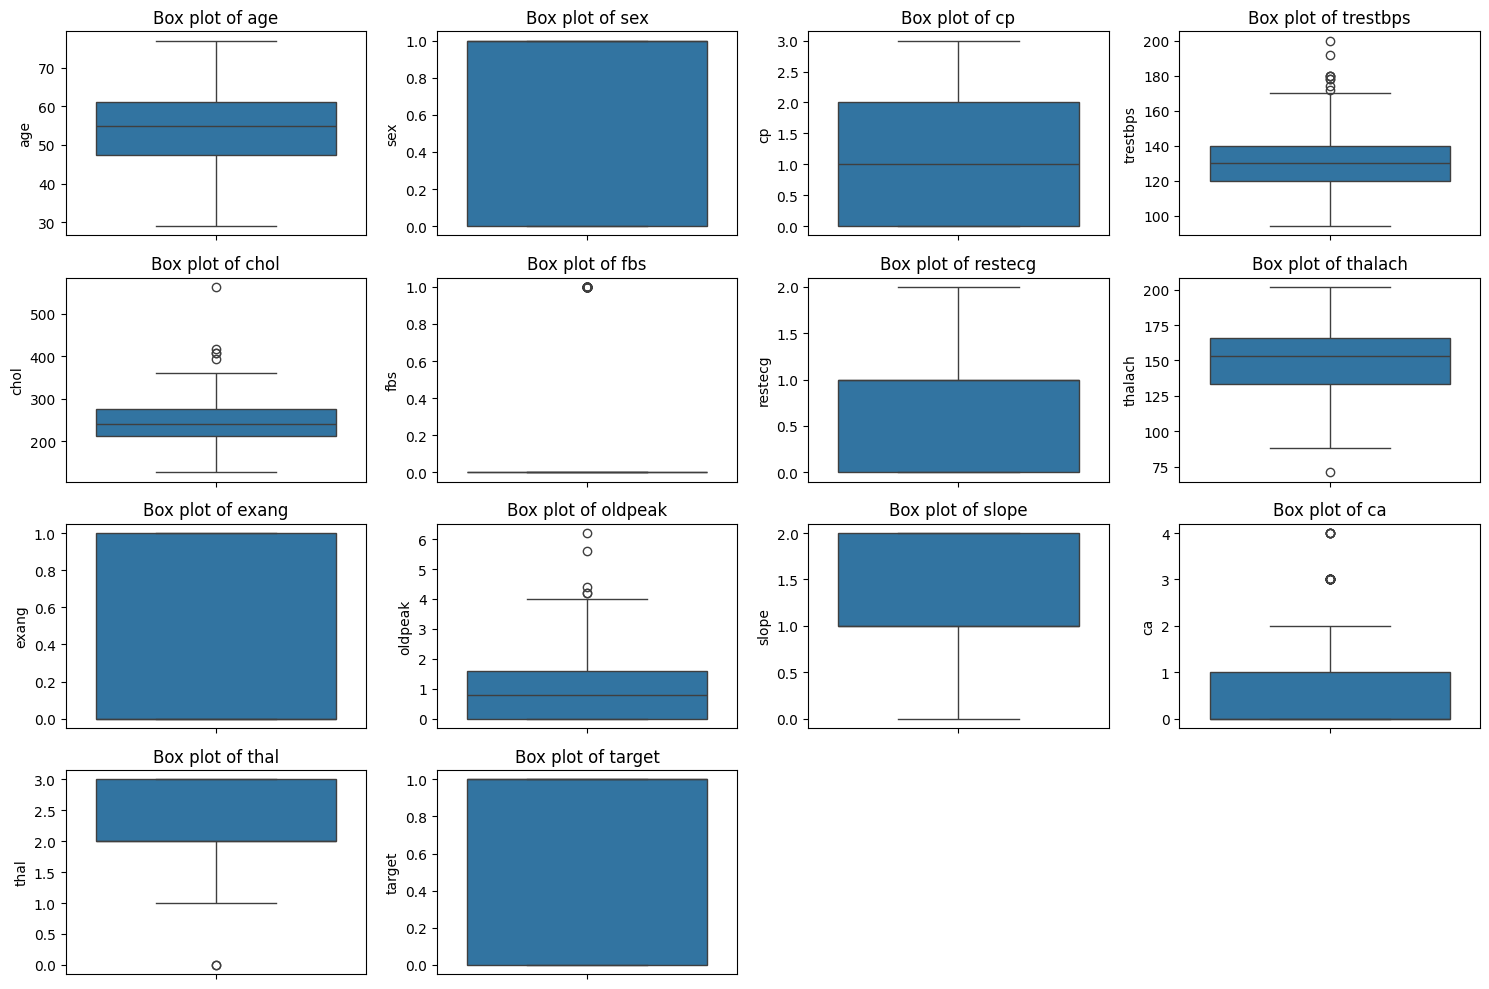

In [175]:
# chek of the data outlire
# plot the data on the plan

plt.figure(figsize=(15, 10))
for i, col in enumerate(data.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col}')
    
plt.tight_layout()
plt.show()

In [176]:
# detect the outlire

def clean_data(data):
    
    # creat new list of data outlieres of the colomns 
    outlire = pd.DataFrame(index=data.index)  
    for col in data.select_dtypes(include=['float64', 'int64']).columns: # choise the eache colomn of the data 
        
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlire[col] = ((data[col] < lower_bound) | (data[col] > upper_bound))  # choise the outlire into tow direction 
    return outlire
    
# these is outlire of the data
outlires = clean_data(data)
# remove the outlire at the data and plot the new data cleaning 
data_cleaned = data[~outlires.any(axis=1)]
data_cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


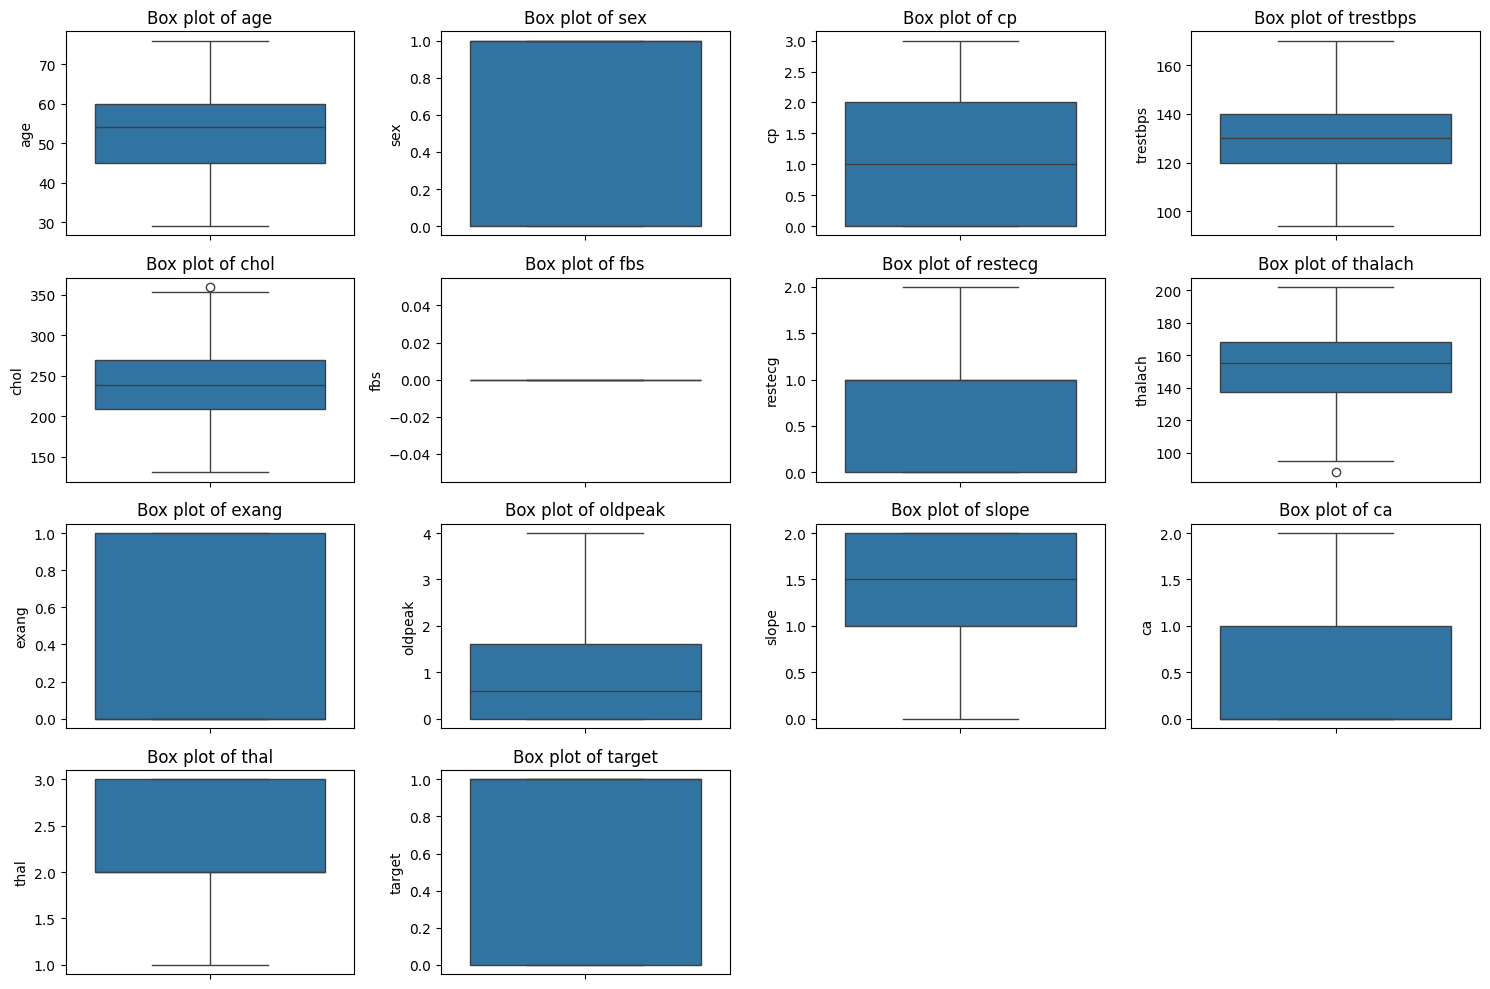

In [177]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data_cleaned.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data_cleaned[col])
    plt.title(f'Box plot of {col}')
    
plt.tight_layout()
plt.show()

# New Splite the Data betwen training and testing 

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_cleaned.drop('target', axis=1)
Y = data_cleaned['target'].values
# scaling data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# split data betwen 80% for trainig and 20% for testing 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)



# Training Model SVM 

In [179]:
from sklearn.svm import SVC

# training model with dataset 
svm_model = SVC(kernel='linear', C=0.1)
svm_model.fit(X_train, y_train)

# predection of the test dataste
y_pred = svm_model.predict(X_test)



# Performoence Model SVM 

In [180]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7608695652173914
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.52      0.67        21
           1       0.71      0.96      0.81        25

    accuracy                           0.76        46
   macro avg       0.81      0.74      0.74        46
weighted avg       0.80      0.76      0.75        46



# Training  Model with ANN

In [181]:
import torch
import torch.nn as nn
import torch.optim as optim

In [182]:
# change the array to tensor beafore the model ANN with pytorch

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Définir le modèle ANN
class HeartDiseaseModel(nn.Module):
    def __init__(self, input_dim):
        super(HeartDiseaseModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16) # conect the input size betwen 16 neural of the ferst layer
        self.relu1 = nn.ReLU() # activation function 
        self.fc2 = nn.Linear(16, 8)  # conect the layer one betwen 8 neural of layre two 
        self.relu2 = nn.ReLU() # activation function
        self.fc3 = nn.Linear(8, 1) # conect layer betwen 1 neural of the layer finlly
        self.sigmoid = nn.Sigmoid() # activation function for probablty 1 or 0
        
    # applined the forward propagation     
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x


In [183]:
input_dim = X_train.shape[1]
model = HeartDiseaseModel(input_dim)

# defined the loss function and optimizer
creation = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [184]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
# training model for 50 epoches
epochs = 1000
batch_size = 16
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)

    losses = criterion(outputs, y_train)
    losses.backward()
    optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f'epoch {epoch+1}/{epochs}, losses: {losses.item():.4f}')


# evaluation model 
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()
    accuracy = (y_pred.eq(y_test).sum() / float(y_test.shape[0])).item()
    print(f'Acurrcy is : {accuracy * 100:.2f}%')

epoch 10/1000, losses: 0.6791
epoch 20/1000, losses: 0.6660
epoch 30/1000, losses: 0.6520
epoch 40/1000, losses: 0.6352
epoch 50/1000, losses: 0.6141
epoch 60/1000, losses: 0.5880
epoch 70/1000, losses: 0.5565
epoch 80/1000, losses: 0.5211
epoch 90/1000, losses: 0.4841
epoch 100/1000, losses: 0.4479
epoch 110/1000, losses: 0.4146
epoch 120/1000, losses: 0.3851
epoch 130/1000, losses: 0.3598
epoch 140/1000, losses: 0.3388
epoch 150/1000, losses: 0.3216
epoch 160/1000, losses: 0.3076
epoch 170/1000, losses: 0.2957
epoch 180/1000, losses: 0.2851
epoch 190/1000, losses: 0.2756
epoch 200/1000, losses: 0.2668
epoch 210/1000, losses: 0.2586
epoch 220/1000, losses: 0.2512
epoch 230/1000, losses: 0.2442
epoch 240/1000, losses: 0.2376
epoch 250/1000, losses: 0.2313
epoch 260/1000, losses: 0.2252
epoch 270/1000, losses: 0.2190
epoch 280/1000, losses: 0.2126
epoch 290/1000, losses: 0.2066
epoch 300/1000, losses: 0.2007
epoch 310/1000, losses: 0.1948
epoch 320/1000, losses: 0.1888
epoch 330/1000, l

# Training Model de xgboost

In [185]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# parametres of xgboost
params = {
    'objective': 'binary:logistic',  # Classification binaire
    'eval_metric': 'logloss',  # Fonction de perte
    'learning_rate': 0.1,
    'max_depth': 4,
    'n_estimators': 100
}

model = xgb.train(params, dtrain, num_boost_round=100)

# Prédictions
y_pred_proba = model.predict(dtest)
y_pred = (y_pred_proba > 0.5).astype(int)

# Évaluer la précision
accurac = accuracy_score(y_test, y_pred)
print(f'Précision sur l’ensemble de test : {accurac * 100:.2f}%')

Précision sur l’ensemble de test : 80.43%


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\training.py:183: UserWarning: [00:33:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "n_estimators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
